In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from pathlib import Path
from PIL import Image

# Analisis exploratorio 

## Extraccion de datos

In [9]:
base_dir = Path("../data/MMNIST/test")

In [ ]:

image_paths = list(base_dir.rglob("*.png"))

records = []
for p in image_paths:
    módulo = p.relative_to(base_dir).parts[0] 
    sample_str, label_str = p.stem.split(".")
    sample_index = int(sample_str)            
    etiqueta     = int(label_str)             

    records.append({
        "path":         str(p),
        "módulo":       módulo,
        "sample_index": sample_index,
        "etiqueta":     etiqueta
    })

df = pd.DataFrame(records)
df


,path,módulo,sample_index,etiqueta
0,..\data\MMNIST\test\m0\0.0.png,m0,0,0
1,..\data\MMNIST\test\m0\0.1.png,m0,0,1
2,..\data\MMNIST\test\m0\0.2.png,m0,0,2
3,..\data\MMNIST\test\m0\0.3.png,m0,0,3
4,..\data\MMNIST\test\m0\0.4.png,m0,0,4
...,...,...,...,...
49995,..\data\MMNIST\test\m4\999.1.png,m4,999,1
49996,..\data\MMNIST\test\m4\999.2.png,m4,999,2
49997,..\data\MMNIST\test\m4\999.3.png,m4,999,3
49998,..\data\MMNIST\test\m4\999.7.png,m4,999,7


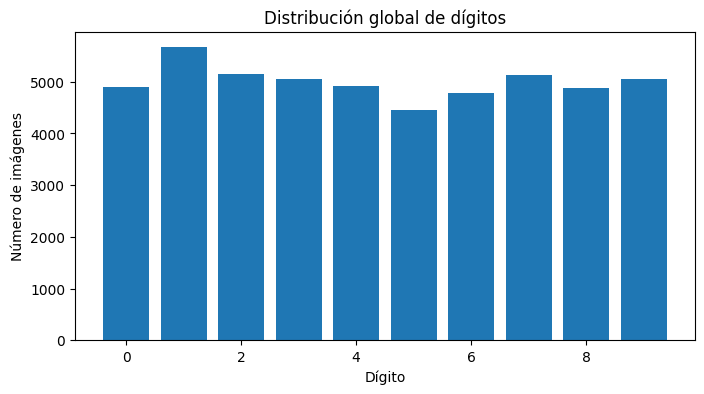

In [21]:
counts_label = df["etiqueta"].value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.bar(counts_label.index, counts_label.values)
plt.title("Distribución global de dígitos")
plt.xlabel("Dígito")
plt.ylabel("Número de imágenes")
plt.show()


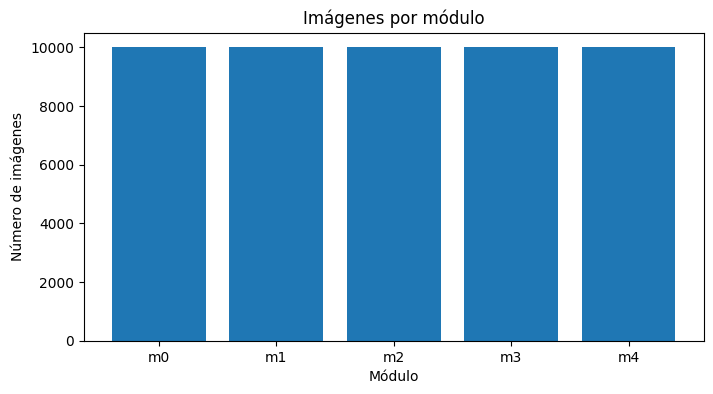

In [22]:
counts_mod = df["módulo"].value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.bar(counts_mod.index, counts_mod.values)
plt.title("Imágenes por módulo")
plt.xlabel("Módulo")
plt.ylabel("Número de imágenes")
plt.show()


In [23]:
crosstab = pd.crosstab(df["módulo"], df["etiqueta"])
print(crosstab)


etiqueta    0     1     2     3    4    5    6     7    8     9
módulo                                                         
m0        980  1135  1032  1010  982  892  958  1028  974  1009
m1        980  1135  1032  1010  982  892  958  1028  974  1009
m2        980  1135  1032  1010  982  892  958  1028  974  1009
m3        980  1135  1032  1010  982  892  958  1028  974  1009
m4        980  1135  1032  1010  982  892  958  1028  974  1009


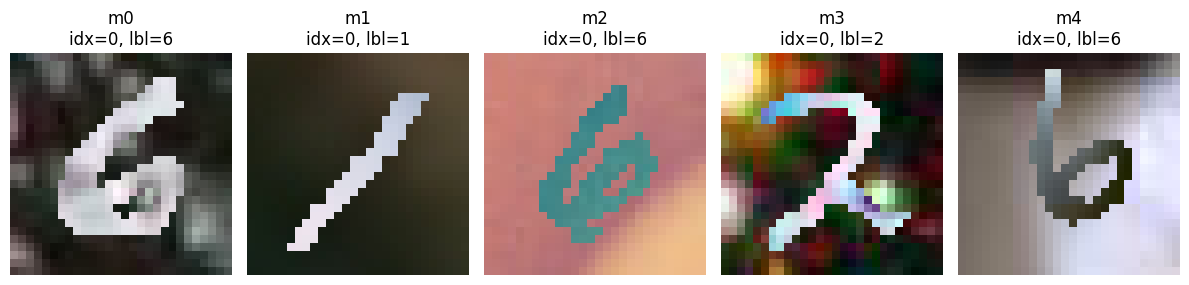

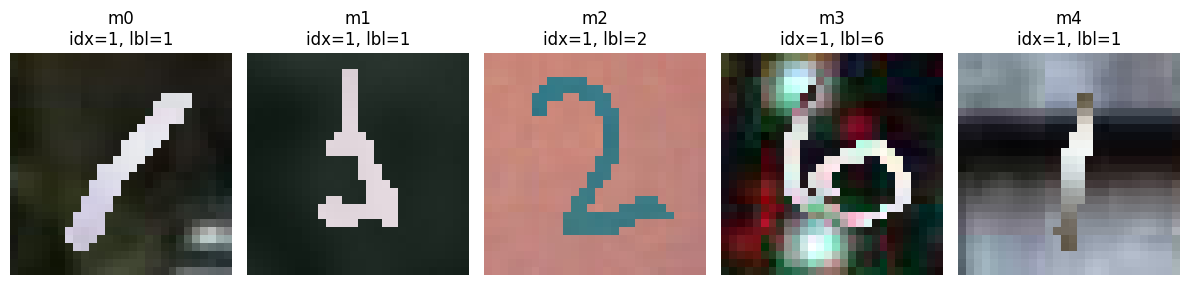

In [24]:
# Elegimos, por ejemplo, sample_index = 0 y 1
for idx in [0, 1]:
    plt.figure(figsize=(12,3))
    subset = df[df["sample_index"] == idx]
    for i, (módulo, grp) in enumerate(subset.groupby("módulo")):
        row = grp.sample(1).iloc[0]  # una muestra aleatoria de ese índice
        img = Image.open(row["path"])
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{módulo}\nidx={idx}, lbl={row['etiqueta']}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
